## 1. Library

In [47]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

## 2. Data Extraction

In [6]:
start=datetime.datetime(2015,1,1)
end=datetime.datetime(2020,1,1)

In [7]:
AAPL=web.DataReader("AAPL",'yahoo',start,end)
CISCO=web.DataReader("CSCO",'yahoo',start,end)
IBM=web.DataReader("IBM",'yahoo',start,end)
AMZN=web.DataReader("AMZN",'yahoo',start,end)



## 3. Normalize Prices

#### Normalize return for all stocks in the list

In [12]:
for stock_df in (AAPL,CISCO,IBM,AMZN):
    stock_df['Normalized Return']=stock_df['Close']/stock_df.iloc[0]['Close']

## 4.  Creating a Portfolio
#### Portfolio Allocation
Our initial position is $1000000.
We will assume we would like to allocate our money as follows:
* 30% in Apple
* 20% in Google/Alphabet
* 40% in Amazon
* 10% in IBM



In [45]:
for stock_df, allo in zip((AAPL,CISCO,IBM,AMZN),[.3,.2,.4,.1]):
    stock_df['Allocation']=stock_df['Normalized Return']*allo
for stock_df in (AAPL,CISCO,IBM,AMZN):
    stock_df['Position Values']=stock_df['Allocation']*1000000 

In [42]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,Normed Return,Normalized Return,Allocation,Position Values
Date,,,,,,,,,,
2014-12-31,113.129997,110.209999,112.820000,110.379997,41403400.0,100.905785,1.000000,1.000000,0.300000,300000.000000
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,99.945885,0.990487,0.990487,0.297146,297146.234512
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,97.130241,0.962584,0.962584,0.288775,288775.147610
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,97.139420,0.962674,0.962674,0.288802,288802.332253
2015-01-07,108.199997,106.699997,107.199997,107.750000,40105900.0,98.501518,0.976173,0.976173,0.292852,292851.973223


### Total Portfolio Value

In [43]:
all_pos_vals=[AAPL['Position Values'],CISCO['Position Values'],
              IBM['Position Values'],AMZN['Position Values']]
portfolio_val=pd.concat(all_pos_vals,axis=1)
portfolio_val.columns=['AAPL Positions','CISCO Positions','IBM Positions','AMZN Positions']
portfolio_val.head()

,AAPL Positions,CISCO Positions,IBM Positions,AMZN Positions
Date,,,,
2014-12-31,300000.000000,200000.000000,400000.000000,100000.000000
2015-01-02,297146.234512,198490.301317,404038.880809,99410.337666
2015-01-05,288775.147610,194536.303111,397681.356469,97370.709360
2015-01-06,288802.332253,194464.410739,389104.973696,95147.415092
2015-01-07,292851.973223,196261.678911,386561.956351,96155.955392


In [44]:
portfolio_val['Total Pos']=portfolio_val.sum(axis=1)
portfolio_val.head()

,AAPL Positions,CISCO Positions,IBM Positions,AMZN Positions,Total Pos
Date,,,,,
2014-12-31,300000.000000,200000.000000,400000.000000,100000.000000,1000000.000000
2015-01-02,297146.234512,198490.301317,404038.880809,99410.337666,999085.754304
2015-01-05,288775.147610,194536.303111,397681.356469,97370.709360,978363.516549
2015-01-06,288802.332253,194464.410739,389104.973696,95147.415092,967519.131779
2015-01-07,292851.973223,196261.678911,386561.956351,96155.955392,971831.563877


Text(0.5, 1.0, 'Each Portfolio Value')

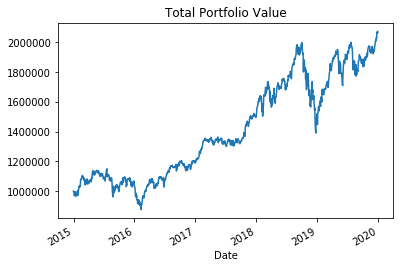

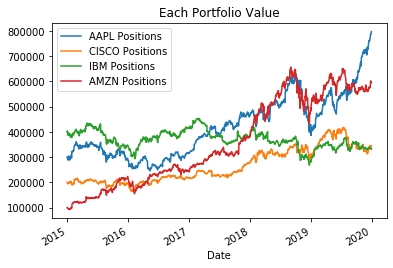

In [80]:
portfolio_val['Total Pos'].plot()
plt.title('Total Portfolio Value')
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')
plt.title('Each Portfolio Value')

## 5. Portfolio Statistics

## Daily Returns

In [100]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

## Cumulative Return

In [97]:
cum_ret = 1000000 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our cumulative return {} !'.format(cum_ret))

Our return 1072480.6092575414 !


## Average Daily Return

In [101]:
portfolio_val['Daily Return'].mean()

0.0006497053666039799

## Sharpe Ratio (Industry Standard for Performance Indicator)
**Sharpe Ratio is a measure for calculating risk-adjusted return

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:
* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

In [103]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()
ASR = (252**0.5)*SR
print('Our sharpe ratio is {x} and Annualized sharpe ratio is {y}'.format(x=SR,y=ASR))

Our sharpe ratio is 0.05483664956578312 and Annualized sharpe ratio is 0.8705048248983613
